There are my notes as I walk through the [Linear Systems and Signals by B. P. Lathi](http://www.amazon.com/Linear-Systems-Signals-2nd-Edition/dp/0195158334/).

In [8]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


# Trigonometry identities

When working with periodic signals (ok, I mean `sin` and `cos`), trigonometry identities and properties come in handy. Here are a few.

$$
\cos(\theta + \phi) = \cos\theta\cos\phi - \sin\theta\sin\phi \\
\cos(\theta - \phi) = \cos\theta \cos\phi + \sin\theta \sin\phi \\
$$

Combining above identities:
$$
\frac{1}{2}\left[\cos(\theta+\phi) + \cos(\theta-\phi)\right] = \cos\theta \cos\phi \\
\frac{1}{2}\left[\cos(\theta-\phi) - \cos(\theta+\phi)\right] = \sin\theta \sin\phi
$$

Also,

$$
\sin(\theta+\phi) = \sin\theta\cos\phi + \cos\theta\sin\phi \\
\sin(\theta-\phi) = \sin\theta\cos\phi - \cos\theta\sin\phi \\
$$

Again, you can combine these to yield,

$$
\frac{1}{2}\left[\sin(\theta+\phi) + \sin(\theta-\phi)\right] = \sin\theta \cos\phi
$$

Furthermore, by combining this simple identity

$$
\sin^2\theta + \cos^2\theta = 1
$$

with

$$
\cos2\theta = \cos^2\theta - \sin^2\theta
$$

You get

$$
\cos2\theta = 2\cos^2\theta -1 \\
\therefore \cos^2\theta = \frac{1}{2}(1 + \cos2\theta)
$$

Similarly,

\begin{align}
\sin^2\theta &= \cos^2(\theta-\pi/2) \\
&= \frac{1}{2}(1 + \cos2(\theta-\pi/2)) \\
&= \frac{1}{2}(1 + \cos(2\theta-\pi)) \\
&= \frac{1}{2}(1 - \cos2\theta)
\end{align}

Above expressions allows you to convert products of $\cos$ and $\sin$ in terms of linear combination of $\cos$ and/or $\sin$, significantly helping with the integration process.

## Chapter 1

### Basic definitions:

* Signal - a set of data or information. Tend to be function of independent variable time, though need not be (e.g. image as function over space)
* System - entity with a capcity to modify and/or extract additional information from signal. It may be perceived as a funtion that operates on *input* signal to produce *output* signal.

*Signal energy* may be considered as a *size* of a signal:

$$
E_x = \int_{-\infty}^{\infty}{x^2(t)\,dt}
$$

For complex signal, you can take squared *magnitude* of the complex signal over time rather than just the signal. Note that this definition is equivalent to the expression above

$$
E_x = \int_{-\infty}^{\infty}{\left|x(t)\right|^2\,dt}
$$

If you were to consider the signal $x(t)$ as a vector, the the energy of the signal can be interpreted as the squared $L_2$ norm of the vector.

Time averaged energy of the signal is, of course, the *power* of the signal:

$$
P_x = \lim_{T\to\infty}\frac{1}{T}\int_{-T/2}^{T/2}{x^2(t)\,dt}
$$

and again for complex signal:

$$
P_x = \lim_{T\to\infty}\frac{1}{T}\int_{-T/2}^{T/2}{\left|x(t)\right|^2\,dt}
$$

A signal with finite energy $E_x$ is called an **energy signal** whereas a signal with finite power $P_x$ is called a **power signal**. Note that a signal *cannot* be both an energy signal and a power signal - being an power signal automatically implies that it is not an energy signal. Also note that you **can** be neither an energy nor a power signal.

The power of the signal $P_x$ is square of the signal's RMS value:

\begin{align}
RMS &= \sqrt{\lim_{T\to\infty}\frac{1}{T}\int_{-T/2}^{T/2}{\left|x(t)\right|^2\,dt}} \\
&= \sqrt{P_x}
\end{align}


**Example 1.2a**

Note that $T = \frac{2 \pi}{\omega_0}$

\begin{align}
P_x &= \frac{1}{T}\int_0^T{\{C\cos(\omega_0t + \theta)\}^2}\,dt \\
&= \frac{1}{T}\int_0^T{C^2\cos^2(\omega_0t + \theta)}\,dt \\
&= \frac{C^2}{2T}\int_0^T{\left(cos(2\omega_0t+2\theta)+1\right)}\,dt \\
&= \frac{C^2}{2} + \frac{C^2}{2T}\int_0^T{cos(2\omega_0t+2\theta)}\,dt \\
&= \frac{C^2}{2}
\end{align}

And hence,

$$
RMS = \sqrt{P_x} = \sqrt{\frac{C^2}{2}} = \frac{C}{\sqrt{2}}
$$

For sinusoid of different frequency, the energy of the sum is the sum of individual energy. This is only true in general for sinusoid of **distinct frequencies** - sinusoids of different frequency are orthogonal in the function space, and thus norm of sum is sum of the norms.

**Ex 1.1(e)**

$x_5(t)=e^{-t}$ for $0\leq t \leq 1$ and $x_5(t+T)=x_5(t)$ where $T=1$

\begin{align}
P_5 &= \frac{1}{1}\int_0^1{[e^{-t}]^2\,dt} \\
&= \int_0^1{e^{-2t}\,dt} \\
&= \left.-\frac{1}{2}e^{-2t}\right]^1_0 \\
&= \frac{1}{2}\left(1-e^{-2}\right)
\end{align}

Evaluating this,

In [174]:
1/2*(1-exp(-2))

0.43233235838169365

So indeed, $P_5 \approx 0.4323$

**Ex 1.3**

Consider power for $x(t)=C_1 \cos(\omega_1t+\theta_1) + C_2 \cos(\omega_2t+\theta_2)$ where $\omega_1 = \omega_2 = \omega$

Since frequency is the same, the signal is *periodic* with $T=\frac{2\pi}{\omega}$, hence:

\begin{align}
P_x &= \frac{1}{T}\int_0^T{[C_1 \cos(\omega t+\theta_1) + C_2 \cos(\omega t+\theta_2)]^2\,dt} \\
&= \frac{1}{T}\int_0^T{\left[C^2_1\cos^2(\omega t+\theta_1) + C^2_2\cos^2(\omega t+\theta_2) + 2C_1C_2\cos(\omega t+\theta_1)\cos(\omega t+\theta_2)\right]\,dt}\\
&=\frac{C_1^2}{2} + \frac{C_2^2}{2} + \frac{1}{T}\int_0^T{2C_1C_2\cos(\omega t+\theta_1)\cos(\omega t+\theta_2)\,dt}
\end{align}

Using the identity $\frac{1}{2}\left[\cos(\theta+\phi) + \cos(\theta-\phi)\right] = \cos\theta \cos\phi $

\begin{align}
P_x &=\frac{C_1^2}{2} + \frac{C_2^2}{2} + \frac{1}{T}\int_0^T{2C_1C_2\cos(\omega t+\theta_1)\cos(\omega t+\theta_2)\,dt} \\
&=\frac{C_1^2}{2} + \frac{C_2^2}{2} + \frac{1}{T}\int_0^T{C_1C_2\left[\cos(2\omega t+\theta_1+\theta_2)+\cos(\theta_1-\theta_2)\right]\,dt} \\
&=\frac{C_1^2}{2} + \frac{C_2^2}{2} + \frac{1}{T}\int_0^T{C_1C_2\cos(2\omega t+\theta_1+\theta_2)\,dt} + \frac{1}{T}\int_0^T{C_1C_2\cos(\theta_1-\theta_2)\,dt} \\
&=\frac{C_1^2}{2} + \frac{C_2^2}{2} + C_1C_2\cos(\theta_1-\theta_2) \\
&=\frac{1}{2}\left[C_1^2 + C_2^2 + 2C_1C_2\cos(\theta_1 - \theta_2)\right]
\end{align}

Note that as $\theta_1-\theta_2$ varies from $[0, 2\pi)$, the power $P_x$ fluctuates sinusoidally between it's maximal value $\frac{1}{2}(C_1+C_2)^2$ and it's minimal value $\frac{1}{2}(C_1 - C_2)^2$. Shown below is the case for which $C_1=3$ and $C_2=1$

(0, 6.283185307179586)

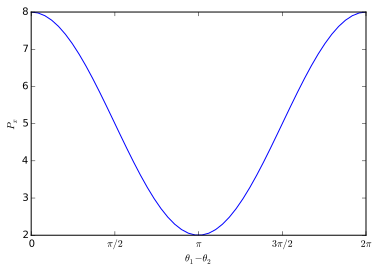

In [23]:
delta = linspace(0, 2*pi)
C_1 = 3
C_2 = 1
P_x = 1/2*(C_1**2 + C_2**2 + 2*C_1*C_2*cos(delta))
plot(delta, P_x)
xlabel(r"$\theta_1 - \theta_2$")
ylabel(r"$P_x$")
xticks(linspace(0,2*pi,5),["0", r"$\pi/2$", r"$\pi$", r"$3\pi/2$", r"$2\pi$"])
xlim([0,2*pi])

### Time manipulation

Shifting and scaling of the independent value of the function $f(t)$ as in $f(t-T)$, $f(t+T)$, $f(kt)$ and $f\left(\frac{t}{k}\right)$ can be thought of as *shifting and scaling the time axis* in an intuitive manner. Hence $f(t+T)$ represents shifting the entire time axis *to the right* by $T$ units, thereby causing the signal to shift *to the left* relative to the time axis. This *right shift* of time axis is consistent with *advance* in time. Also, scaling of $t$ as in $f(kt)$ can be understood as *expanding* the time axis by a factor of $k$, thereby causing the signal to *shrink* relative to the time axis by a factor of $k$. Since you multiplied the time, this is consistent with speeding up the time.

Note that $f(kt)$ expands (or shrinks, if $k < 1$) the signal *centered at 0*. To have it such that the signal expands (or shrinks) around other value, you can combine two shift operations with the shriking operation in the right order. When combining time change, the operation always go from outside in. To get the time expanded around say $a$, we want to 

1. shift the signal to the left by $a$ units, making $a$ come at 0
2. expand the signal around 0 by factor of $k$
3. shift the signal center from 0 back to $a$ by right shifting by $a$

This is equivalent to: $f(k(x-a)+a)$

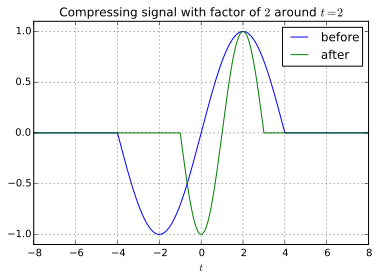

In [175]:
t = linspace(-8,8,1000)
y = lambda t: sin(pi/4*t) * (abs(t) < 4)
k = 2
a = 2
plot(t, y(t), label='before')
plot(t, y(k*(t-a)+a), label='after')
legend()
axis([-8, 8, -1.1, 1.1])
grid()
xlabel('$t$')
title('Compressing signal with factor of $%d$ around $t=%d$' % (k, a))

Also when plotting, scaling and shift operation can be achieved by manuplating the $t$ values alone. However the operation on $t$ is reversal of what you would do to $t$ within the function. If you want to plot $f(kt+b)$, for example, then you have to modify value of $t$ such that $kt^\prime+b=t$ where $t^\prime$ is the new value of x scale. Hence, $t^\prime = (t-b)/k$. This is illustrated below:

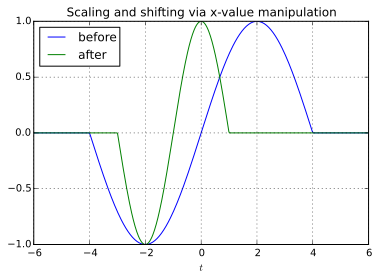

In [163]:
t = linspace(-20, 20,1000)
y = sin(pi/4*t) * (abs(t) < 4)
k = 2
b = 2
t_p = (t - b) / k
plot(t, y, label='before')
plot(t_p, y, label='after')
legend(loc='upper left')
grid()
xlim([-6, 6])
xlabel('$t$')
title('Scaling and shifting via x-value manipulation')

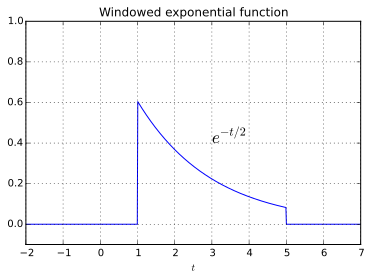

In [11]:
def step(t, start, end):
    return logical_and(t >= start, t < end)

t = linspace(-3, 10, 1000)
x = exp(-t/2) * step(t, 1, 5)
plot(t, x)
axis([-2, 7, -0.1, 1])
annotate(r'$e^{-t/2}$', xy=(3, 0.4), fontsize='xx-large')
grid()
xlabel('$t$')
title('Windowed exponential function')

Similar steps can be taken to reflect a signal around a desired poin in time. To reflect the signal around $t=a$,

1. Move $t=a$ to the center by shifting $f(t+a)$
2. Reflect around 0 by $f(-t)$
3. Place the signal back at $a$ by $f(t-a)$

Combining above three yields $f(-(t-a)+a)=f(2a-t)$

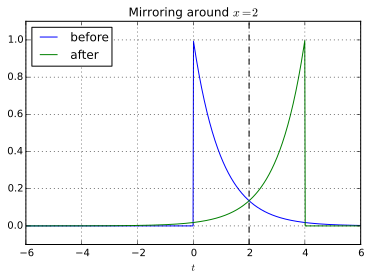

In [172]:
t = linspace(-8,8,1000)
y = lambda t: exp(-t) * (t>0)
a = 2
plot(t, y(t), label='before')
plot(t, y(2*a-t), label='after')
axvline(a, linestyle='--', color='black')
legend(loc="upper left")
grid()
axis([-6, 6, -0.1, 1.1])
xlabel('$t$')
title('Mirroring around $x=%d$' % a)

### Types of signal

Signals can be classified into a several classes according to its:

* temporal/sampling characteristics: discrete vs continuous
* signal level characteristics: analog (inifinite levels) vs digital (finite levels)
* periodicitity: periodic vs aperiodic
* energy and power characteristic: energy signal vs power signal vs neither
* mechanistic characteristic: deterministic vs stochastic

#### Periodic signal

For a periodic signal, the evaluation of integral can start anywhere as long as it covers one period. This can be shown as follows:

Let $f(t)$ be a periodic signal with fundamental period $T_0$ such that $f(t+kT_0)=f(t)$ for $\forall_{k \in \mathbb{Z}}$

Suppose we want to evaluate the integral:

$$
\int_0^{T_0}{f(t)\,dt}
$$

We want to show the following equivalence:

$$
\int_0^{T_0}{f(t)\,dt} = \int_a^{a+T_0}{f(t)\,dt}
$$

for $\forall_{a \in \mathbb{R}}$

To show this, we split the integral into two parts, and then employ a change of variable $\tau=t+T_0$ on one of the integral. After that, $\tau$ is replaced with symbol $t$ and integrals are combined again.

\begin{align}
\int_0^{T_0}{f(t)\,dt} &= \int_0^a{f(t)\,dt} + \int_a^{T_0}{f(t)\,dt} \\
&= \int_{T_0}^{a+T_0}{f(\tau-T_0)\,d\tau} + \int_a^{T_0}{f(t)\,dt} \\
&= \int_{T_0}^{a+T_0}{f(\tau)\,d\tau} + \int_a^{T_0}{f(t)\,dt} \\
&= \int_a^{T_0}{f(t)\,dt} + \int_{T_0}^{a+T_0}{f(t)\,dt}\\
&= \int_a^{a+T_0}{f(t)\,dt}
\end{align}
as we set out to proove.

Applying the above identity twice, you can show that

$$
\int_a^{a+T_0}{f(t)\,dt} = \int_0^{T_0}{f(t)\,dt} = \int_b^{b+T_0}{f(t)\,dt}
$$

for $\forall_{a,b\in \mathbb{R}}$

And thus integral evaluates to same value as long as you integrate over one full cycle for a periodic signal.

#### Power signal and Energy signal

A power signal (a signal with finite and non-zero power) is necessarily *not* an energy signal. Although this is intuitive, how can we prove that?

Let $f(t)$ be a power signal, such that

$$
\lim_{T \to \infty}{\frac{1}{T}\int_{-T/2}^{T/2}{f^2(t)\,dt}}=P
$$

where P is some consant $P \in \mathbb{R}^+$

By definition of limit, this means that for any $\epsilon \in \mathbb{R}^+$, there must exist $T_\epsilon$ for which 
$$
\left|\frac{1}{T}\int_{-T/2}^{T/2}{f^2(t)\,dt} - P\right| < \epsilon
$$
for $\forall_{T > T_\epsilon}$

Using this, let's show that the energy of the above signal:
$$
E=\lim_{T \to \infty}{\int_{-T/2}^{T/2}{f^2(t)\,dt}}
$$
must necessary approach $\infty$ or that
$$
\lim_{T\to\infty}E(T)=\infty
$$
where
$$
E(T) = \int_{-T/2}^{T/2}{f^2(t)\,dt}
$$

To show that the energy is unbounded, it suffices to show that for any arbitrary large value $H$, there exists $T_M$ such that $E(T) > M$ for $\forall_{T>T_M}$

We already know that

$$
\left|\frac{1}{T}\int_{-T/2}^{T/2}{f^2(t)\,dt} - P\right| < \epsilon
$$
whenever $T > T_\epsilon$

$$
\therefore \frac{1}{T}\int_{-T/2}^{T/2}{f^2(t)\,dt} > P - \epsilon
$$
for all $T > T_\epsilon$

Rearranging this, you can see that

$$
E(T)=\int_{-T/2}^{T/2}{f^2(t)\,dt} > T(P - \epsilon)
$$
for all $T > T_\epsilon$

For concreteness of expression, let us choose $\epsilon=P/2$, giving:
$$
E(T)=\int_{-T/2}^{T/2}{f^2(t)\,dt} > \frac{1}{2}TP
$$
for all $T > T_{\epsilon=P/2}$


Now for an arbitrary large number $M$, let us select $T_M$ as

$$
T_M = \max\left(\frac{2M}{P}, T_\epsilon\right)
$$

Choosing $T_M$ in such manner guarantees that

$$
T_M \geq \frac{2M}{P}
$$

and thus

$$
\frac{1}{2}T_MP > M
$$

while still ensuring that $T_M \geq T_{\epsilon=P/2}$, such that for all $T > T_M$

$$
E(T)=\int_{-T/2}^{T/2}{f^2(t)\,dt} > \frac{1}{2}TP > \frac{1}{2}T_MP
$$

Combining these, it can be seen that for any $T > T_M$:

$$
E(T) > \frac{1}{2}TP > \frac{1}{2}T_MP \geq M
$$

Hence for any arbitrary large $M$, we have a consistent method of obtaining $T_M$ such that $E(T) > M$ for $\forall_{T>T_M}$.

By definition, this is equivalent to the statement that

$$
\lim_{T \to \infty}{E(T)}=E=\infty
$$

Hence any power signal has necessarily unbouned energy, and thus cannot be an energy signal.

### Some useful functions

#### Unit step function

Unit step function $u(t)$ is very easy to define in Python.

In [14]:
def u(t):
    return 1.0 * t > 0

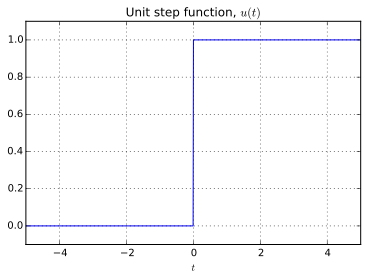

In [15]:
t = linspace(-5, 5, 1000)
plot(t, u(t))
axis([-5, 5, -0.1, 1.1])

grid()
xlabel('$t$')
title(r'Unit step function, $u(t)$')

Any rectangular pulse can easily be created by combining two time shifted unit step functions. For example to obtain unit pulse starting at $t=2$ and lasting for 2 units of time (until $t=4$):

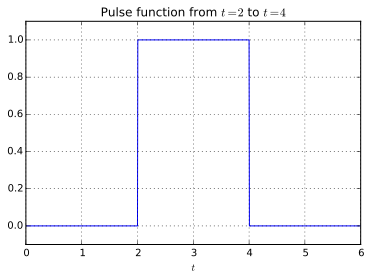

In [17]:
t = linspace(0, 6, 1000)
x = u(t-2) - u(t-4)
plot(t, x)
axis([0, 6, -0.1, 1.1])
grid()
xlabel('$t$')
title(r'Pulse function from $t=2$ to $t=4$')

In general, a pulse of height $C$ starting at $t=a$ and ending at $t=b$ can be written as:

$$
x(t) = C\left[u(t-a)-u(t-b)\right]
$$

This is a very convenient expression to write piecewise defined functions in a closed form.

Multiplying a signal $x(t)$ with a pulse function has the effect of *widowing* the signal.

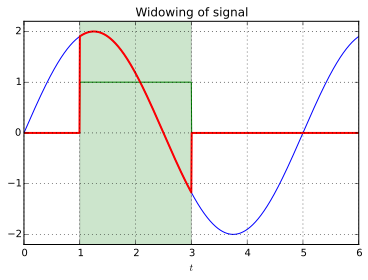

In [156]:
t = linspace(0, 7, 1000)
x = 2 * sin(2*pi/5*t)
a=1
b=3
window = u(t-a)-u(t-b)
x_w = x * window
plot(t, x, 'b', label='original signal')
plot(t, window, 'g', label='window')
plot(t, x_w, 'r', label='windowed signal', linewidth=2)
axvspan(a, b, facecolor='g', alpha=0.2)
axis([0, 6, -2.2, 2.2])
grid()
xlabel('$t$')
title('Widowing of signal')

#### Unit impulse functions

Unit impulse functions are often represented by an arrow. Following is a simple function to draw a vertical arrow to represent unit impulse functions in a plot.

In [32]:
def impulse(t, y=1, **kwargs):
    annotate('', xy=(t, y), xytext=(t, 0),
             arrowprops=dict(facecolor='black',
                             headwidth=5,
                             width=1,
                             shrink=0.0), **kwargs)

(0, 5.0)

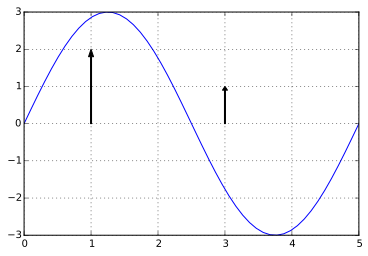

In [31]:
t = linspace(0, 5)
y = 3*sin(2*pi/5*t)
plot(t, y)
impulse(1, 2)
impulse(3)
grid()
xlim(0)

Integrating the area under the curve of the product of a continous signal $f(t)$ and the unit impulse function at $t=T$, $\delta(t-T)$, yields:

$$
\int_{-\infty}^\infty{f(t)\delta(t-T)\,dt} = f(T)
$$

This is known as *sampling property* or *sifting property* of the unit impulse function, and will serve as a critical basis for bridging continous and discrete time signal analysis.

Unit impulse is best thought of as an *generalized functions* - functions that are defined based on *its effect on other functions*. It is precisely the above sifting property that is used to define unit impulse as a generalized function. This means that the behavior of unit impuse is only well defined within an integral.

#### Exponential functions

Function of the form $e^{st}$ where $s \in \mathbb{C}$ appears ubiquitously in signals and systems analysis. This is mainly because practically all signals can be expressed as a sum of one or more (often infinite) combinations of such complex exponential functions.

For $s=\sigma + j\omega$ where $j = \sqrt{-1}$:

\begin{align}
e^{st} &= e^{\sigma t}e^{j\omega t} \\
&=e^{\sigma t}[\cos\omega t + j \sin \omega t]
\end{align}

As a generalization to the well known Euler's formula for $e^{j\omega t}$, $s=\sigma + j\omega$ is refered to as the *complex frequency*.

Note that we use $j$ instead of $i$ to denote imaginary number in the field of engineering, particularly in electrical engineering. This is to avoid confusion with $i$ which is used to denote (a.c.) current in a circuit analysis.

Following expressions regarding complex exponential will come in handy:

\begin{align}
\cos(\omega t + \phi) &= \frac{1}{2}\left[e^{j(\omega t + \phi)} + e^{-j(\omega t + \phi)}\right] \\
&= \Re{\left(e^{j(\omega t + \phi)}\right)}
\end{align}

\begin{align}
\sin(\omega t + \phi) &= \frac{1}{2}\left[e^{j(\omega t + \phi)} - e^{-j(\omega t + \phi)}\right] \\
&= \Im{\left(e^{j(\omega t + \phi)}\right)}
\end{align}

For $s \in \mathbb{C}$, following identity are also useful at times:

$$
\Re{(s)} = \frac{1}{2}\left(s + s^*\right)
$$

$$
\Im{(s)} = \frac{1}{2}\left(s - s^*\right)
$$

#### Even and odd functions

Any function can be expressed as the sum of an even and an odd functions. To see this, let us start by assuming that a function $x(t)$ can be expressed as a sum of an even function $x_e(t)$ and an odd function $x_o(t)$:

$$
x(t) = x_e(t) + x_o(t)
$$

Then,

\begin{align}
x(-t) &= x_e(-t) + x_o(-t) \\
&= x_e(t) - x_o(t)
\end{align}

It follows that:

$$
x(t) + x(-t) = 2x_e(t) \\
\therefore x_e(t) = \frac{1}{2}[x(t) + x(-t)]
$$

and 

$$
x(t) - x(-t) = 2x_o(t) \\
\therefore x_o(t) = \frac{1}{2}[x(t) - x(-t)]
$$

Since both of these two expressions always exists, we just showed that:

* an arbitrary function $x(t)$ can always be written as a sum of an even function $x_e(t)$ and an odd function $x_o(t)$
* the even function $x_e(t)$ and the odd function $x_o(t)$ are **unique** for each $x(t)$

### Systems

### Linear systems

The response of linear system can be broken down into:
* the response caused by the input $x(t)$ for $t \geq 0$ under 0 initial conditions (zero-state response)
* the response caused by initial conditions under no input (zero-input response)

The fact you can separate responses into these components are known as the *decomposition property* of the linear system.

### Stability

* Externally stable system - bounded input produces bounded output (BIBO)